# Global YouTube Statistics
---

### Is there a correlation between population in education or unemployment rate and the number of successful YouTube channels for each country?

In [10]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Get cleaned data CSV
youtube_df = pd.read_csv("../Cleaned_Data/cleaned_youtube_data.csv", encoding="iso-8859-1")

# Preview data
youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [8]:
# Show unique country count
len(youtube_df["Country"].unique())

48

In [32]:
# Separate out the Education and Unemployment Rate per country
country_rates = youtube_df[["Country","Gross tertiary education enrollment (%)","Unemployment rate"]]

# Remove duplicate rows
country_rates = country_rates.drop_duplicates().set_index("Country")

country_rates.head()

,Gross tertiary education enrollment (%),Unemployment rate
Country,,
India,28.1,5.36
United States,88.2,14.70
Japan,63.2,2.29
Russia,81.9,4.59
South Korea,94.3,4.15


In [33]:
# Remove un-required columns for analysis
col_reduce_df = youtube_df[["Youtuber","subscribers","video views","uploads","Country"]]

# # Rename Column
# col_reduce_df = col_reduce_df.rename(columns={"Gross tertiary education enrollment (%)":"Education Enrollment (%)",
#                                             "Unemployment rate":"Unemployment rate (%)"})

# Preview
col_reduce_df.head()

,Youtuber,subscribers,video views,uploads,Country
0,T-Series,245000000,228000000000,20082,India
1,YouTube Movies,170000000,0,1,United States
2,MrBeast,166000000,28368841870,741,United States
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,United States
4,SET India,159000000,148000000000,116536,India


In [43]:
# Group and obtain number of Youtubers per country
yt_per_country = col_reduce_df.groupby("Country").size()

yt_plot_df = pd.DataFrame({"Country YouTuber's":yt_per_country})

yt_plot_df = pd.merge(yt_plot_df,country_rates, on="Country")

yt_plot_df = yt_plot_df.loc[yt_plot_df["Country YouTuber's"] >= 10,:]

yt_plot_df

,Country YouTuber's,Gross tertiary education enrollment (%),Unemployment rate
Country,,,
Argentina,13,90.0,9.79
Brazil,61,51.3,12.08
Canada,15,68.9,5.56
Colombia,11,55.3,9.71
India,161,28.1,5.36
Indonesia,27,36.3,4.69
Mexico,32,40.2,3.42
Philippines,10,35.5,2.15
Russia,16,81.9,4.59


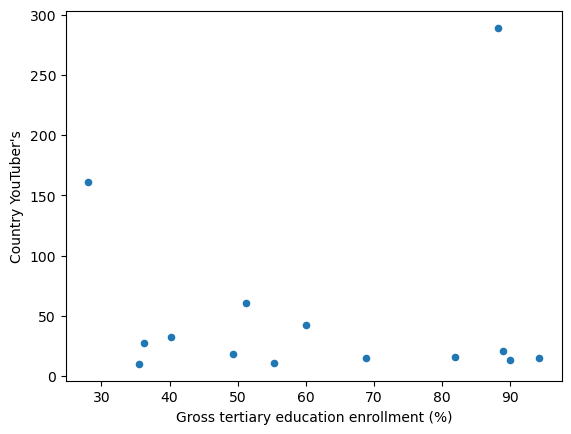

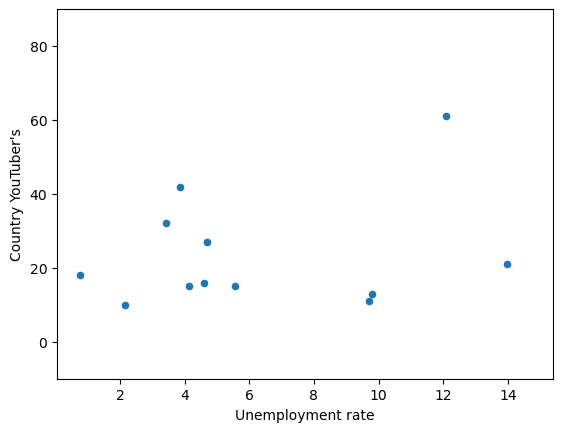

In [44]:
# Plot Education vs YouTuber's

yt_plot_df.plot(kind="scatter", x="Gross tertiary education enrollment (%)",y="Country YouTuber's")
yt_plot_df.plot(kind="scatter", x="Unemployment rate",y="Country YouTuber's")
plt.ylim(-10,90)
plt.show()